<a href="https://colab.research.google.com/github/muhhadimanyu/11181065_Muhhadi_DM_IF-ITK/blob/main/11181065_Muhhadi_DM_IF_ITK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set-Up Drive

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
cd /content/drive/MyDrive/Irish/

/content/drive/MyDrive/Irish


In [46]:
cd /content/drive/MyDrive/Irish/

/content/drive/MyDrive/Irish


# Import Library

In [47]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Manggil data IRIS.csv

In [11]:
df = pd.read_csv('IRIS.csv')

In [12]:
iris = df.copy()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
iris.info()
iris.species.value_counts() # Iris flower species

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

# Memvisualkan Data IRIS.csv

Text(0.5, 1.0, 'Distribusi panjang dan lebar kelopak bunga')

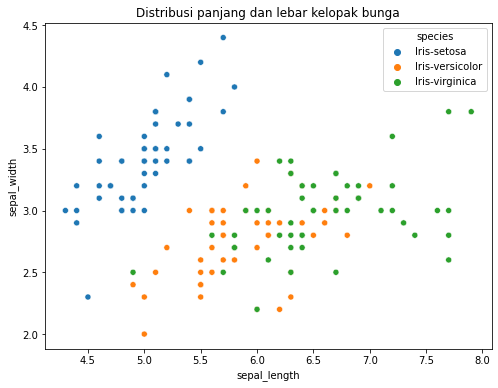

In [14]:
plt.figure(figsize=(8,6));
sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width, hue=iris.species).set_title("Distribusi panjang dan lebar kelopak bunga")

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoding = LabelEncoder()
 # proses encoding attribut species menjadi 0,1,2
iris['species'] = label_encoding.fit_transform(iris['species'])
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
6,4.6,3.4,1.4,0.3,0
111,6.4,2.7,5.3,1.9,2
28,5.2,3.4,1.4,0.2,0
86,6.7,3.1,4.7,1.5,1
75,6.6,3.0,4.4,1.4,1


In [16]:
# IMPORT SKLEARN untuk evaluasi model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Set X dan Y

In [17]:
y = iris.species # yang ingin di klasifikasi
X = iris.drop('species',axis=1)

In [18]:
X.sample(3)

,sepal_length,sepal_width,petal_length,petal_width
100,6.3,3.3,6.0,2.5
6,4.6,3.4,1.4,0.3
70,5.9,3.2,4.8,1.8


Membagi dataset menjadi train dataset dan test dataset. Saya membuat test Dataset 20%

In [35]:
from sklearn.model_selection import KFold, train_test_split, cross_val_predict

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0) # 20% dari dataset digunakan untuk test dataset

# Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
y_pred = naive_bayes_model.predict(X_test)

In [38]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

print('Akurasi Random Forrest: ' + "{:.1%}".format(accuracy_score(y_pred, y_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Akurasi Random Forrest: 96.7%


# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
random_forrest = RandomForestClassifier(n_estimators=100)
random_forrest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
y_pred = random_forrest.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
from __future__ import division
print('Akurasi Random Forrest: ' + "{:.1%}".format(accuracy_score(y_pred, y_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Akurasi Random Forrest: 100.0%
